<a href="https://colab.research.google.com/github/herkart1011/MachineLearningTasks/blob/main/Week%201/02_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multiple Linear Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

## Importing the dataset

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Machine Learning Dataset/Week 1/50_Startups.csv')

## Feature Engineering

In [ ]:
# 1. Memisahkan fitur (X) dan target (y)
# Misalkan kolom terakhir 'Profit' adalah target, dan sisanya adalah fitur
X = dataset.iloc[:, :-1].values  # Semua kolom kecuali kolom terakhir (Fitur)
y = dataset.iloc[:, -1].values   # Kolom terakhir (Target - Profit)

Kode ini memisahkan dataset ke dalam dua bagian:
* X: Berisi semua kolom fitur (independen) yang digunakan untuk memprediksi target. Fitur X mengisi kolom - kolom seperti R&D Spend, Administration, Marketing Spend, dan State
* y: Berisi target (dependen) yang ingin diprediksi. Target (y) adalah Profit, yang merupakan kolom terakhir dalam dataset dan ingin diprediksi berdasarkan fitur-fitur tersebut.

In [ ]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

Kode ini digunakan untuk mengubah data kategorikal yang ada pada fitur-fitur di dataset menjadi representasi numerik menggunakan teknik One-Hot Encoding. Berikut penjelasan rinci dari tiap komponen:
* **ColumnTransformer** : Merupakan kelas dari sklearn.compose yang digunakan untuk menerapkan transformasi yang berbeda pada kolom yang berbeda dari suatu DataFrame. Memungkinkan kita untuk menerapkan berbagai teknik prapemrosesan data pada beberapa kolom secara simultan.
* **transformers** adalah argumen yang menerima daftar transformasi yang ingin diterapkan pada kolom tertentu.
* **('encoder', OneHotEncoder(), [3])** adalah salah satu elemen dalam daftar transformers yang menunjukkan bahwa :
  * **'encoder'** adalah nama transformasi yang bisa digunakan untuk referensi.
  * **OneHotEncoder()** adalah teknik prapemrosesan yang akan digunakan. Ini akan mengonversi nilai kategorikal pada kolom yang ditentukan menjadi one-hot encoded (mengubah data kategorikal menjadi representasi biner).
  * **[3]** menunjukkan kolom ke-3 (indeks 3, dimulai dari 0) dari dataset X yang akan diterapkan One-Hot Encoding. Kolom ini diasumsikan sebagai kolom kategorikal (misalnya, kolom State dalam dataset 50_Startups).

## Splitting the dataset into the Training set and Test set

In [ ]:
# Membagi dataset menjadi training set dan test set (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

Memproses *unpacking* untuk membagi hasil dari **train_test_split()** ke dalam 4 variabel :
* X_train: Fitur untuk training set.
* X_test: Fitur untuk test set.
* y_train: Target (label) untuk training set.
* y_test: Target (label) untuk test set.

train_test_split adalah fungsi dari sklearn.model_selection yang digunakan untuk membagi dataset menjadi dua bagian: training set dan test set :
* test_size=0.4: Menentukan proporsi dari dataset yang akan digunakan sebagai test set. Dalam kasus ini, 40% dari data akan digunakan sebagai test set, dan sisanya 60% akan digunakan sebagai training set.
* random_state=0: Menentukan nilai acak untuk pengacakan data. Ini memastikan bahwa setiap kali kode dijalankan, hasil pembagian training dan test set akan selalu sama. Hal ini membantu reproduktibilitas hasil.

## Training the Multiple Linear Regression model on the Training set

In [ ]:
# Membuat model Multiple Linear Regression
regressor = LinearRegression()

# Melatih model menggunakan data training set
regressor.fit(X_train, y_train)

# Menampilkan koefisien (slope) dan intercept dari model yang dilatih
print("Koefisien (Slope):", regressor.coef_)
print("Intercept:", regressor.intercept_)

Koefisien (Slope): [-1.37917310e+03  4.82908628e+03 -3.44991318e+03  8.53965513e-01
  2.01084031e-02  2.19671703e-02]
Intercept: 42583.10659882959


* fit() adalah metode dari kelas LinearRegression yang digunakan untuk melatih model berdasarkan data training X_train (fitur) dan y_train (target). Ketika fit() dijalankan, model akan mempelajari hubungan antara fitur dan target untuk menemukan garis terbaik yang meminimalkan kesalahan prediksi (garis regresi) pada data training set.


## Predicting the Test set results

In [ ]:
# Memprediksi hasil test set
y_pred = regressor.predict(X_test)

# Menampilkan hasil prediksi vs nilai asli
print("\nHasil prediksi pada test set:")
print(y_pred)
print("\nNilai asli pada test set:")
print(y_test)


Hasil prediksi pada test set:
[110086.00524799 134506.25917514 141700.33713882  76548.13903985
 189440.99377556 111040.19790977  61804.42320135  96350.05020386
 119733.02618581 178648.38705883 101589.35336781  84652.38884833
 117583.49513453  88651.79744097 134537.25264954 168723.33367788
 158622.36504641  42525.69867145  40636.5575425  100588.76822647]

Nilai asli pada test set:
[103282.38 144259.4  146121.95  77798.83 191050.39 105008.31  81229.06
  97483.56 110352.25 166187.94  96778.92  96479.51 105733.54  96712.8
 124266.9  155752.6  132602.65  64926.08  35673.41 101004.64]


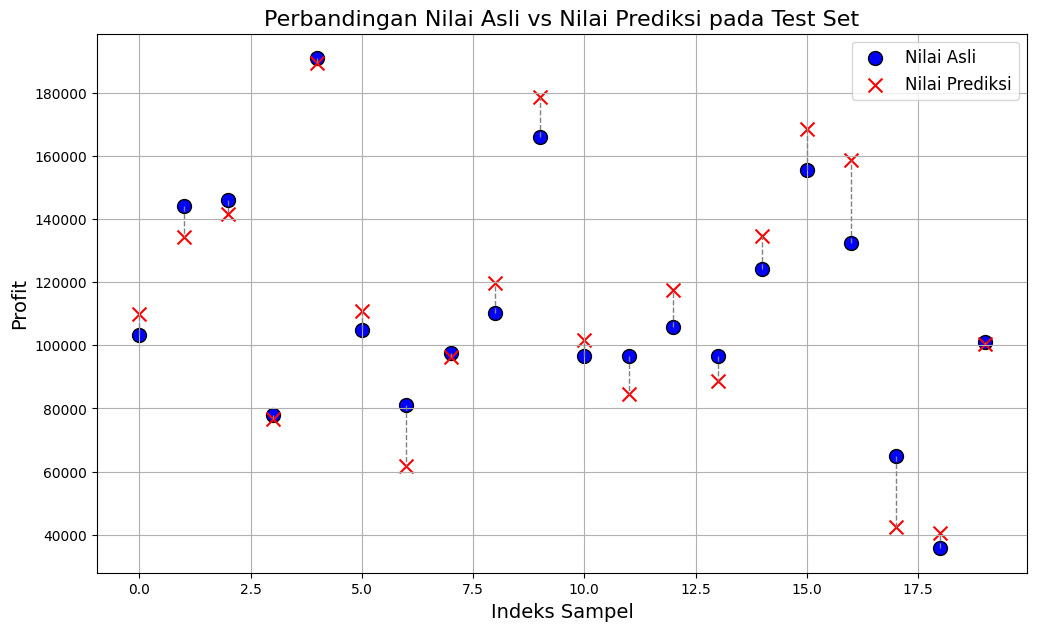

In [ ]:
# Membuat plot yang lebih informatif dan menarik
plt.figure(figsize=(12, 7))

# Scatter plot untuk nilai asli
plt.scatter(range(len(y_test)), y_test, color='blue', label='Nilai Asli', marker='o', s=100, edgecolor='black')

# Scatter plot untuk nilai prediksi
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Nilai Prediksi', marker='x', s=100)

# Menghubungkan nilai asli dan prediksi dengan garis
for i in range(len(y_test)):
    plt.plot([i, i], [y_test[i], y_pred[i]], color='gray', linestyle='--', linewidth=1)

# Menambahkan judul dan label pada grafik
plt.title('Perbandingan Nilai Asli vs Nilai Prediksi pada Test Set', fontsize=16)
plt.xlabel('Indeks Sampel', fontsize=14)
plt.ylabel('Profit', fontsize=14)

# Menambahkan grid untuk memudahkan pembacaan
plt.grid(True)

# Menampilkan legenda
plt.legend(fontsize=12)

# Menampilkan plot
plt.show()
